## Data Structures and Algorithms Assignment 2
## Cian Belton 19321726 
## George Dagg 

### Imports for this notebook:

In [2]:
import networkx as net
import matplotlib.pyplot as plt

### Task 1: Sorting Algorithm Run Time and Complexity

### Task 2: Shortest Path (Dijkstra's) Algorithm and Graphs

The following image is the step through of Dijkstraâs algorithm for the provided graph to go from vertex A to vertex G.
The key is as follows:
- Each vertex that has been visited is added to 'Visited:' with the most recent addition the current vertex.
- The lowest total distance currently for each node is underlined in red beside each node.
- The best path known so far to each node is highlighted in yellow.
- Note for the sake of brevity I did not include any nodes that were at infinity, so any nodes not included in the first 4 images are at infinity.

<img src="dijkstra_by_hand.jpg">


#### Discussion of results:
From the image above it is clear that there were many changes for the shortest paths in this weighted graph. This can be easily seen in the change of where the highlighted lines are. G for example had 3 different weights depending on the stage of the algorithm: 29, 26 and 25.

#### Verification of results with code
#### Weighted Graph 

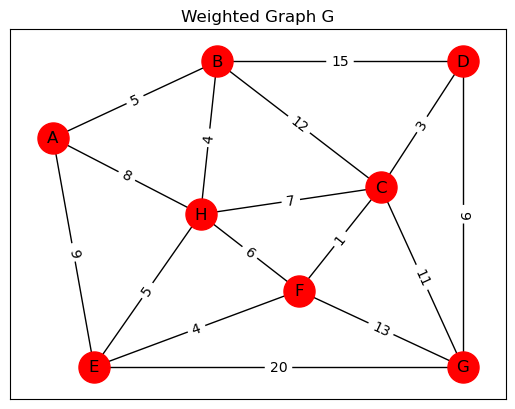

In [15]:
#create an empty weighted graph
G = net.Graph()

#adding nodes to the graph
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])

#add weighted edges
G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'H', weight=8)
G.add_edge('A', 'E', weight=9)
G.add_edge('B', 'H', weight=4)
G.add_edge('B', 'C', weight=12)
G.add_edge('B', 'D', weight=15)
G.add_edge('C', 'D', weight=3)
G.add_edge('C', 'G', weight=11)
G.add_edge('D', 'G', weight=9)
G.add_edge('C', 'F', weight=1)
G.add_edge('F', 'G', weight=13)
G.add_edge('E', 'F', weight=4)
G.add_edge('E', 'G', weight=20)
G.add_edge('E', 'H', weight=5)
G.add_edge('C', 'H', weight=7)
G.add_edge('H', 'F', weight=6)

#draw the graph
pos= {'A': [0, -0.2], 'B': [0.2,  0], 'C': [0.4,-.33], 'D': [0.5, 0], 'E': [0.05, -0.8], 'F': [0.3, -0.6], 'G': [0.5,-0.8], 'H': [ 0.18, -0.4]}
net.draw_networkx(G, pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(G, 'weight')
d=net.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
#add a title
plt.title('Weighted Graph G')
plt.show()


#### Dijkstra's Algorithm

In [11]:
#dijkstra's algorithm
#print the shortest path from A to all nodes using dijkstra_path
#print the minimum distance from A to all nodes using dijkstra_path_length
for node in G.nodes():
    print("Shortest path from A to ", node, " is: ", net.dijkstra_path(G, 'A', node))
    print("Minimum distance from A to ", node, " is: ", net.dijkstra_path_length(G, 'A', node))
    print("----------------------------------------------------------")

Shortest path from A to  A  is:  ['A']
Minimum distance from A to  A  is:  0
----------------------------------------------------------
Shortest path from A to  B  is:  ['A', 'B']
Minimum distance from A to  B  is:  5
----------------------------------------------------------
Shortest path from A to  C  is:  ['A', 'E', 'F', 'C']
Minimum distance from A to  C  is:  14
----------------------------------------------------------
Shortest path from A to  D  is:  ['A', 'E', 'F', 'C', 'D']
Minimum distance from A to  D  is:  17
----------------------------------------------------------
Shortest path from A to  E  is:  ['A', 'E']
Minimum distance from A to  E  is:  9
----------------------------------------------------------
Shortest path from A to  F  is:  ['A', 'E', 'F']
Minimum distance from A to  F  is:  13
----------------------------------------------------------
Shortest path from A to  H  is:  ['A', 'H']
Minimum distance from A to  H  is:  8
--------------------------------------------

#### Graph of shortest path tree

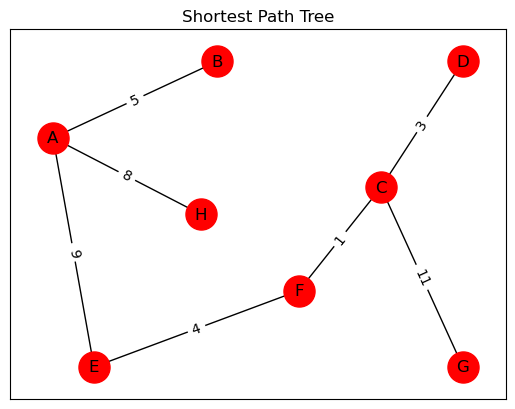

In [14]:

#compute all shortest paths and distances using Dijkstra's algorithm
shortest_paths = net.single_source_dijkstra_path(G, 'A')

#create a new graph with only the edges in the shortest path tree
S = net.Graph()
for node, path in shortest_paths.items():
    for i in range(len(path) - 1):
        S.add_edge(path[i], path[i+1], weight=G[path[i]][path[i+1]]['weight'])

#draw the shortest path tree, use same positions as original graph
net.draw_networkx(S, pos, with_labels=True, node_color='red', node_size=500)
edge_labels = net.get_edge_attributes(S, 'weight')
net.draw_networkx_edge_labels(S, pos=pos, edge_labels=edge_labels)
#add a title
plt.title('Shortest Path Tree')
plt.show()

#### Discussion of results:
- The code above verifies our hand-drawn solution for task 2.
- The minimum distance from A to each node is the same as computed by hand.
- The shotest path from A to each node is the same as drawn by hand.
- Using networkx is a very useful tool for analysing and creating graphs.

### Task 3: Minimum Spanning Tree (MST) using Prim's Algorithm


The following image is the step through of Prim's algorithm to find the Minimum Spanning Tree to connect the 8 islands in the lake.
The key is as follows:
- Each vertex that has been visited is added to 'Visited:' with the most recent addition the current vertex.
- The distance of each node from root is underlined in red at each stage
- The MST is highlighted in yellow incrementally
- Note for the sake of brevity, in step 4 of this image I decided to only draw edges that were below 200 weight and were connecting to neighbours (the reason why the edge from 6->7 only appeared in step 7). Another reason for this was that many of the edges were redundant, this will be illustrated below.

<img src="prim_by_hand_1.jpg">

#### Clearer MST and Drawing Of All Edges:
- The follwing image contains a sketch of the MST in a more ordered fashion.
- It also contains the graph of the 8 islands with all the bridge possibilities drawn.
- The MST is drawn on the graph of the islands for clarity. 
- The aim of this drawing was to illustrate my point for only drawing edges that had a viable option of being in the MST as it is clear that there would have been significant extra (largely pointless) work in drawing a graph of all possible edges for every step.

<img src="prim_by_hand_2.jpg">

#### Discussion of results:
